In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [5]:


# this is from the pytorch website. I just want to play around with their example




transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print("type of trainset: ", type(trainset))
print("trainset[0]: ", len(trainset[0][:]))
print("type trainset[0][1]: ", type(trainset[0][1]))

print("type of trainloader: ", type(trainloader))
print("enumerate(trainloader): ", enumerate(trainloader))

print(trainloader)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net.to(device)

losses = []

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            # print("shape of input: ", inputs.shape)
            # print("shape of output: ", outputs.shape)
            # print("Here is the first output: ", outputs[0])
            losses.append(running_loss)

            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Files already downloaded and verified
type of trainset:  <class 'torchvision.datasets.cifar.CIFAR10'>
trainset[0]:  3
type trainset[0][1]:  <class 'int'>
type of trainloader:  <class 'torch.utils.data.dataloader.DataLoader'>
enumerate(trainloader):  <enumerate object at 0x000001A80C326AC0>


KeyboardInterrupt: 

12
3422.6792830228806


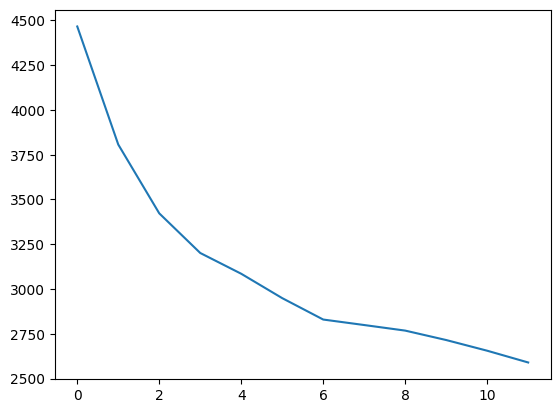

In [29]:
# plt.scatter(np.arange(0, len(losses)), losses)
plt.plot(losses)
print(len(losses))
print(losses[2])